In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
imdb_df = pd.read_csv('../data/imdb.csv', dtype = {'genre': 'category'})
imdb_df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


# Using Data Frame

In [4]:
imdb_df.isnull().head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [5]:
imdb_df.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [6]:
imdb_df[imdb_df.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


# Using Underlying NumPy

In [7]:
imdb_df.isnull().values    # .values gives the underlying numpy array

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ..., 
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]], dtype=bool)

In [8]:
imdb_df.isnull().values.any()

True

In [9]:
imdb_df.isnull().values.sum()

3

In [10]:
imdb_df[imdb_df.isnull().values]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


# Taking care of NA

In [11]:
imdb_df.shape

(979, 6)

In [12]:
imdb_df.dropna(how = 'any').shape    # Drop row if any data in a row is missing

(976, 6)

In [13]:
imdb_df.dropna(how = 'all').shape    # Not always the case, but if all column's data is missing, delete that row

(979, 6)

In [14]:
imdb_df.dropna(subset = ['content_rating'], how = 'all').shape    # Delete a row if a specific column of a row is missing

(976, 6)

In [15]:
imdb_df.dropna(inplace = True)

In [16]:
imdb_df.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

# Filling Missing Values

### Simple

In [17]:
ufo_df = pd.read_csv('../data/ufo.csv', dtype = {'Shape Reported': 'category'})
ufo_df.columns = ufo_df.columns.str.lower()
ufo_df.columns = ufo_df.columns.str.replace(' ', '_')
ufo_df.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [18]:
ufo_df.dtypes

city                 object
colors_reported      object
shape_reported     category
state                object
time                 object
dtype: object

In [19]:
ufo_df.shape

(18241, 5)

In [20]:
ufo_df.isnull().sum()

city                  25
colors_reported    15359
shape_reported      2644
state                  0
time                   0
dtype: int64

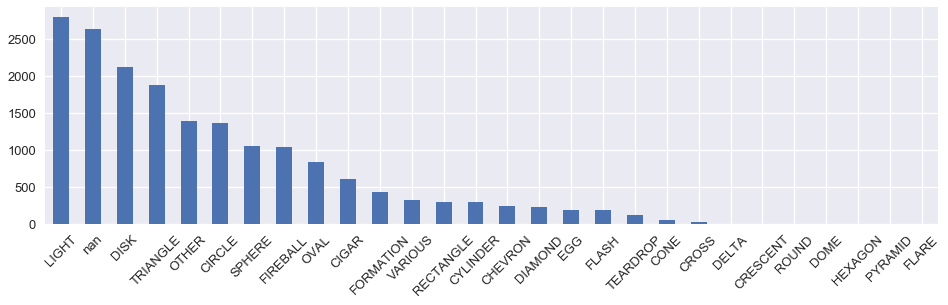

In [21]:
sns.set_context('talk')
ufo_df.shape_reported.value_counts(dropna = False).plot(kind = 'bar', rot = 45, figsize = (16, 4))
plt.show()

In [22]:
ufo_df.shape_reported.fillna(value = 'VARIOUS', inplace = True)

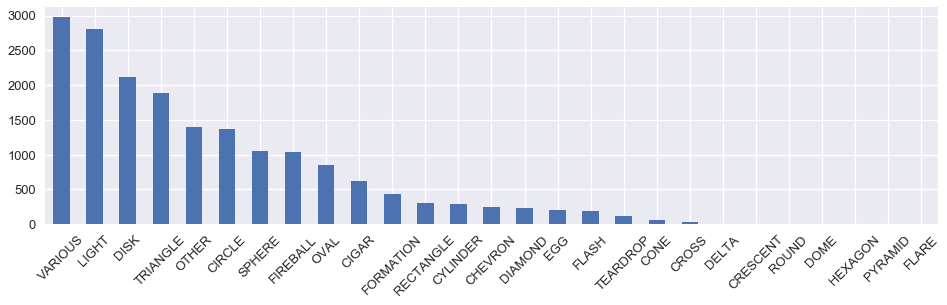

In [23]:
sns.set_context('talk')
ufo_df.shape_reported.value_counts().plot(kind = 'bar', rot = 45, figsize = (16, 4))
plt.show()

### Interpolation based

In [24]:
# TODO: 

### Time Series based

In [25]:
# TODO: 